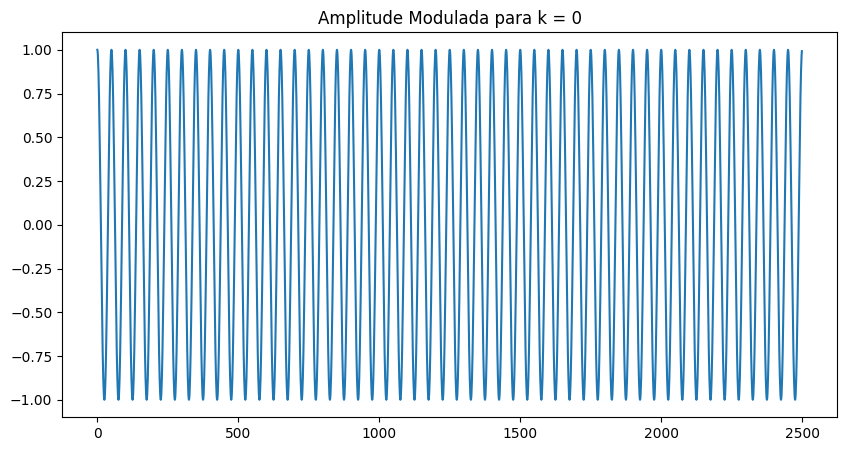

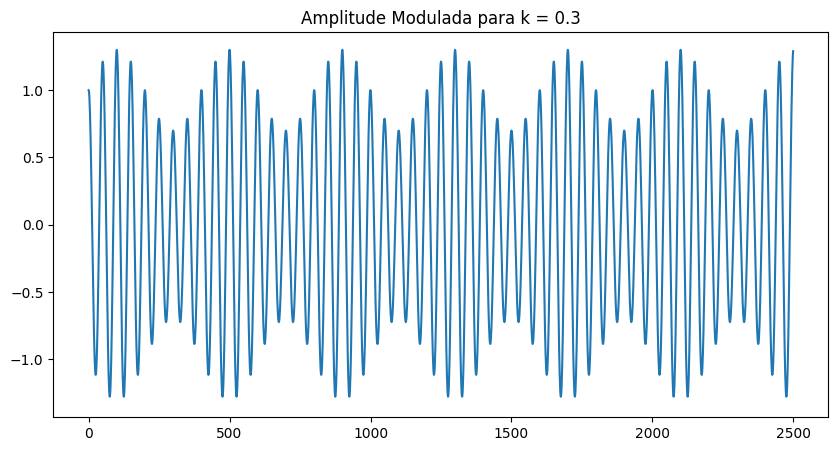

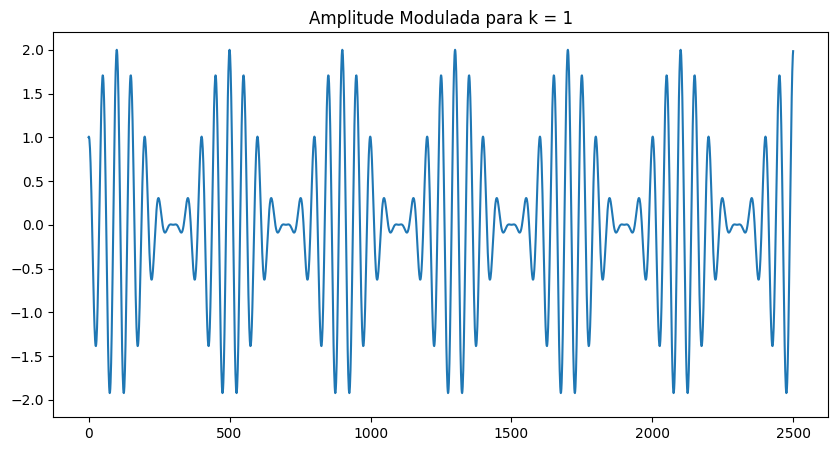

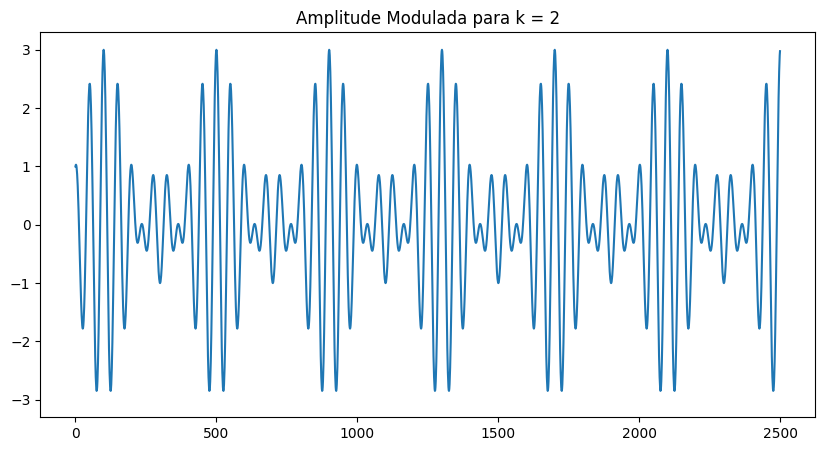

In [14]:
#A(1 + m(t).k)*cos(w.t.phi)
import numpy as np
import matplotlib.pyplot as plt

#Multiplicador da amplitude
A = 1
#frequencia
w = 8
#quantidade de amostras
samples = 2500
#constante da sensiblidade da amplitude do modulador
k_vec = [0,.3,1,2]
#vetor vazio q vai receber as amostras
y = []
# Transform character to bytes

for k in k_vec:

    for i in range(samples):
        # Transform bytes to integer
        t = i/400
        msg = np.sin(t*2*np.pi)
        y.append(A*(1 + msg*k)*np.cos(w*t*2*np.pi))
    ylim = (A+k)*1.1
    plt.figure(1,figsize=(10,5))
    plt.ylim(-ylim,ylim)
    plt.title('Amplitude Modulada para k = '+str(k))
    plt.plot(y)
    plt.show()
    y.clear()




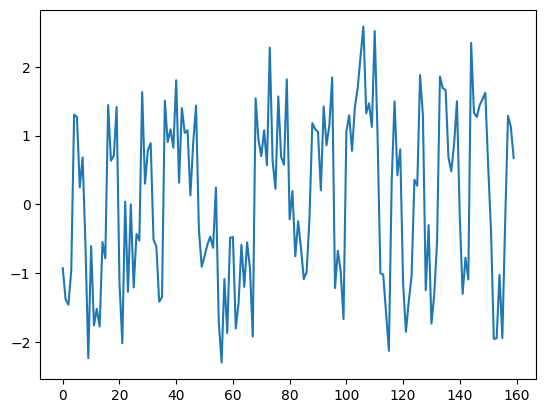

In [8]:
string = "Ipsum"
bin_vector = []
for char in string:
    binary = bin(ord(char))[2:]
    diff = 8-len(binary)
    for j in range(diff):
        binary = '0' + binary
    for char in binary:
        i=0
        while i < 4:
            if char == '0':
                bin_vector.append((-1))
                i += 1
            else:
                bin_vector.append((1))
                i += 1

ruido = np.random.normal(0, 0.6, len(bin_vector))
bin_vector = bin_vector + ruido
#mapeamento bpsk
plt.plot(bin_vector)

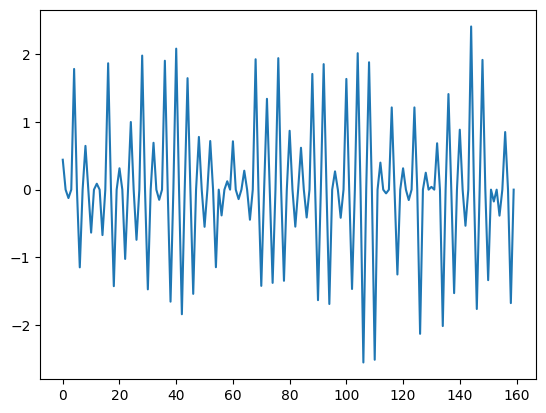

In [9]:
A = 1
#frequencia
w = 8
#quantidade de amostras
samples = len(bin_vector)
#constante da sensiblidade da amplitude do modulador
k = 0.6
#vetor vazio q vai receber as amostras
sender = []
# Transform character to bytes
step = 1/(int(samples/5))

for i in range(samples):
    # Transform bytes to integer
    t = i*step
    msg = bin_vector[i]
    sender.append(A*(1 + msg*k)*np.cos(w*t*2*np.pi))

ylim = (A+k)*1.1
plt.plot(sender)
plt.show()

In [10]:
receiver = []
i = 0

while i< samples:
    t = i*step
    elem1 = ((sender[i]/(np.cos(w*t*2*np.pi)*A)) - 1)/k
    elem2 = ((sender[i+1]/(np.cos(w*(t+ 1*step)*2*np.pi)*A)) - 1)/k
    elem3 = ((sender[i+2]/(np.cos(w*(t+ 2*step)*2*np.pi)*A)) - 1)/k
    elem4 = ((sender[i+3]/(np.cos(w*(t+ 3*step)*2*np.pi)*A)) - 1)/k
    sum = elem1 + elem2 + elem3 + elem4
    if sum > 0:
        receiver.append(1)
    else:
        receiver.append(0)
    i+=4

# Concatenate the array of 0s and 1s
binary_array = receiver
mensage = ""
for i in range(0, len(binary_array), 8):
    # Convert the binary array to a string
    binary_string = ''.join(str(bit) for bit in binary_array[i:i + 8])
    # Convert the binary string to an integer
    decimal_value = int(binary_string, 2)
    # Convert the decimal value to a byte
    char = decimal_value.to_bytes(1, 'big').decode('utf-8')
    mensage += char

print(mensage)




Ipsum
